## Plot of non linear params $Bl(x), K_m(x), L_e(x)$

            4             3             2
-5.538e+14 x - 6.036e+09 x + 6.896e+06 x + 54.15 x + 6.833


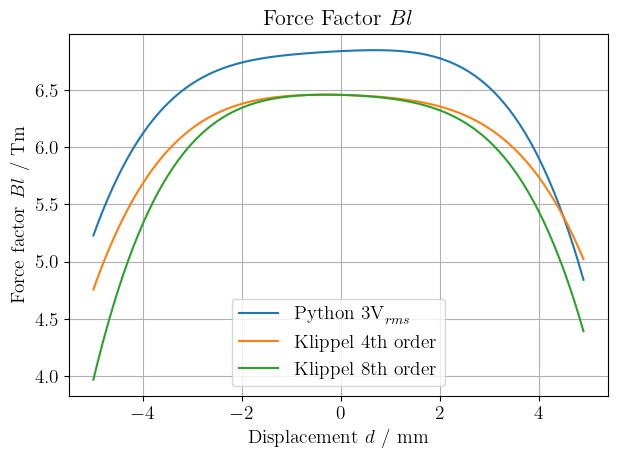

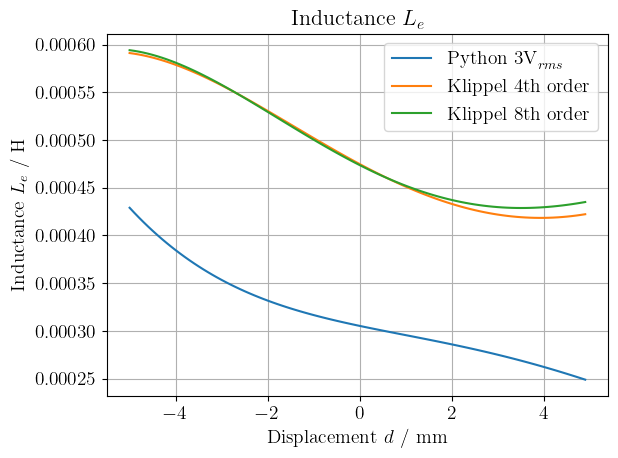

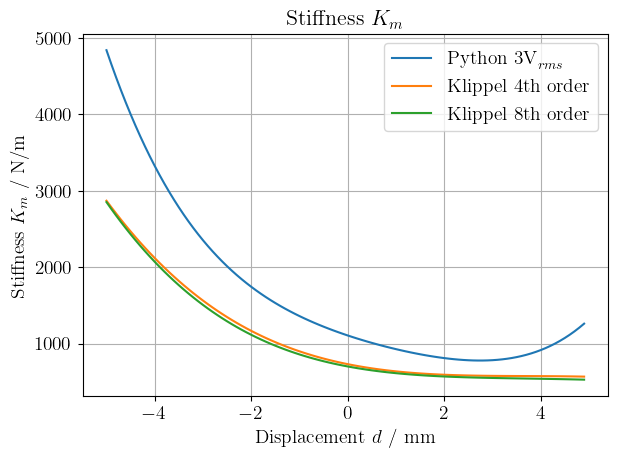

In [27]:
import engutil
import util
import numpy as np 

params, polys_klippel_4th = util.load_speaker_parameters("data/parameters/klippel-params-4th-order.json", dataset_name="4thorder")
params, polys_klippel_8th = util.load_speaker_parameters("data/parameters/klippel-params-4th-order.json", dataset_name="8thorder")
params, polys_python_3v = util.load_speaker_parameters("data/parameters/python-params-1.json", dataset_name="3Vrms")
params, polys_python_015v = util.load_speaker_parameters("data/parameters/python-params-1.json", dataset_name="015Vrms")

x = np.arange(-5e-3, 5e-3, 1e-4)
x_plot = x*1e3


y_K_klippel_4th = polys_klippel_4th["K"](x)
y_Le_klippel_4th = polys_klippel_4th["Le"](x)
y_Bl_klippel_4th = polys_klippel_4th["Bl"](x)

y_K_klippel_8th = polys_klippel_8th["K"](x)
y_Le_klippel_8th = polys_klippel_8th["Le"](x)
y_Bl_klippel_8th = polys_klippel_8th["Bl"](x)

y_Bl_python_3v = polys_python_3v["Bl"](x)
y_Le_python_3v = polys_python_3v["Le"](x) 
y_K_python_3v = polys_python_3v["K"](x)


y_Bl_python_015v = polys_python_015v["Bl"](x)
y_Le_python_015v = polys_python_015v["Le"](x) 
y_K_python_015v = polys_python_015v["K"](x)


print(polys_python_015v["Bl"])

legends = ["$\\textrm{Python 3V}_{rms}$", "$\\textrm{Klippel 4th order}$", "$\\textrm{Klippel 8th order}$"]

# engutil.plot_time_series([(x_plot,y_Bl_python_015v)], ylabel="Force factor $Bl$ / Tm", xlabel="Displacement $d$ / mm", title="Force Factor $Bl$", save_loc="figures/nonlins/force_factor", grid=True, legends=legends)


engutil.plot_time_series([(x_plot,y_Bl_python_3v), (x_plot, y_Bl_klippel_4th), (x_plot, y_Bl_klippel_8th)], ylabel="Force factor $Bl$ / Tm", xlabel="Displacement $d$ / mm", title="Force Factor $Bl$", save_loc="figures/nonlins/force_factor", grid=True, legends=legends)


engutil.plot_time_series([(x_plot,y_Le_python_3v), (x_plot, y_Le_klippel_4th), (x_plot, y_Le_klippel_8th)], ylabel="Inductance $L_e$ / H", xlabel="Displacement $d$ / mm", title="Inductance $L_e$", save_loc="figures/nonlins/inductance", grid=True, legends=legends)



engutil.plot_time_series([(x_plot,y_K_python_3v), (x_plot, y_K_klippel_4th), (x_plot, y_K_klippel_8th)], ylabel="Stiffness $K_m$ / N/m ", xlabel="Displacement $d$ / mm", title="Stiffness $K_m$ ", save_loc="figures/nonlins/stiffness", grid=True, legends=legends)


Plotting Force Factor $Bl$...


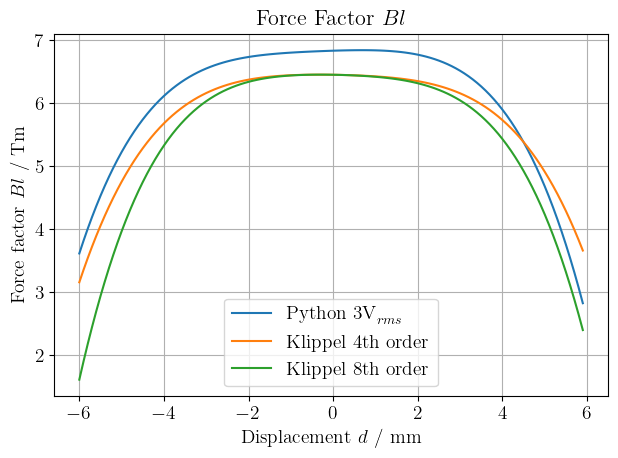

Plotting Inductance $L_e$...


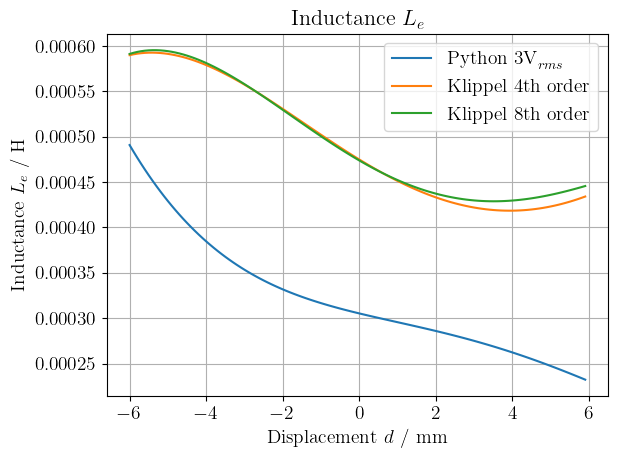

Plotting Stiffness $K_m$...


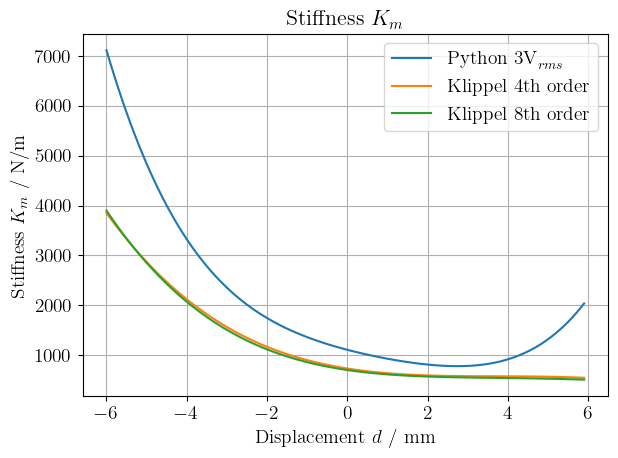

In [1]:
import numpy as np
import util
import engutil

# ==========================================
# 1. CONFIGURATION
# ==========================================

# Define the datasets we want to compare
datasets = [
    {
        "label": r"$\textrm{Python 3V}_{rms}$",
        "file": "data/parameters/python-params-1.json", 
        "set_name": "3Vrms",
        "active": True
    },
    {
        "label": r"$\textrm{Klippel 4th order}$",
        "file": "data/parameters/klippel-params-4th-order.json", 
        "set_name": "4thorder",
        "active": True
    },
    {
        "label": r"$\textrm{Klippel 8th order}$",
        "file": "data/parameters/klippel-params-4th-order.json", 
        "set_name": "8thorder",
        "active": True
    },
    {
        "label": r"$\textrm{Python 0.15V}_{rms}$",
        "file": "data/parameters/python-params-1.json", 
        "set_name": "015Vrms",
        "active": False # Set to True to include in plots
    }
]

# Define the physical parameters we want to plot
parameters_to_plot = [
    {
        "key": "Bl",
        "title": "Force Factor $Bl$",
        "ylabel": "Force factor $Bl$ / Tm",
        "filename": "force_factor"
    },
    {
        "key": "Le",
        "title": "Inductance $L_e$",
        "ylabel": "Inductance $L_e$ / H",
        "filename": "inductance"
    },
    {
        "key": "K",
        "title": "Stiffness $K_m$",
        "ylabel": "Stiffness $K_m$ / N/m",
        "filename": "stiffness"
    }
]

# ==========================================
# 2. DATA LOADING
# ==========================================

# Load all active datasets into a structured list
loaded_data = []

for ds in datasets:
    if ds["active"]:
        _, polys = util.load_speaker_parameters(ds["file"], dataset_name=ds["set_name"])
        loaded_data.append({
            "polys": polys,
            "label": ds["label"]
        })

# ==========================================
# 3. CALCULATION & PLOTTING
# ==========================================

# Setup displacement vector
x = np.arange(-6e-3, 6e-3, 1e-4)
x_plot = x * 1e3 # Convert to mm

# Loop through the parameters (Bl, Le, K)
for param in parameters_to_plot:
    
    series_list = []
    legend_list = []
    
    # Loop through the loaded datasets (Python, Klippel, etc.)
    for data in loaded_data:
        # Get the specific polynomial (e.g., polys["Bl"])
        poly_func = data["polys"][param["key"]]
        
        # Calculate Y
        y_values = poly_func(x)
        
        # Store for plotting
        series_list.append((x_plot, y_values))
        legend_list.append(data["label"])
    
    # Plot
    print(f"Plotting {param['title']}...")
    engutil.plot_time_series(
        series_list,
        ylabel=param["ylabel"],
        xlabel="Displacement $d$ / mm",
        title=param["title"],
        save_loc=f"figures/nonlins/{param['filename']}",
        grid=True,
        legends=legend_list
    )